# 5th of July, 2018
## Benjamin Adam Catching
## Andino Lab Rotation
## Poliovirus DIP Project

Play with poliovirus data that has been passaged seven times. The data has already been processed to 'Q20' files. The data will first need to be read into as Pandas dataframes. From the dataframe a consensus sequence will be generated. The consensus sequence will be compared against the reference genome, looking for mutations. Mutations will be mapped to either synonymous or non-synonymous mutations. High-frequency mutations that are picked up will be analyzed as well for either synonymous or nonn-synonymous mutations. The most probable (consensus) and ancillary mutations will be tracked over time for frequency. Similarity will be noted by replicate comparison.

In [13]:
# Import the usual packages for bioinformatic analysis
import numpy as np
import matplotlib.pyplot as plt
import os
from Bio import Seq, SeqIO
import glob
import pandas as pd
import seaborn as sns
from skbio import DNA 
import skbio

In [3]:
# Import poliovirus 1 genome for reference
pv1_genome_file = '../../data/sequence/Poliovirus_1.fasta'
pv1_genome = next(SeqIO.parse(pv1_genome_file, 'fasta'))

In [4]:
# Import the passage files
pv1_passage_rep_1_file_names = '../../data/sequence/Cirseq/PV_replicates_1/*/Q20*'
pv1_passage_rep_1_files = sorted(glob.glob(pv1_passage_rep_1_file_names))

pv1_passage_rep_2_file_names = '../../data/sequence/Cirseq/PV_replicates_2/*/Q20*'
pv1_passage_rep_2_files = sorted(glob.glob(pv1_passage_rep_2_file_names))

In [5]:
# Read a test file into a pandas dataframe
test_df = pd.read_csv(pv1_passage_rep_1_files[0], delimiter='\t', header=None)
# Set the position as the index
test_df = test_df.set_index(0)
# Rename the columns
test_df = test_df.rename(columns={1: 'Consensus', 2: 'A', 3:'C', 4:'G', 5:'T'})
# Show the first few rows
test_df.head()

,Consensus,A,C,G,T
0,,,,,
1,T,0,0,0,126
2,T,0,0,0,198
3,A,283,0,0,0
4,A,522,0,0,0
5,A,957,0,0,0


In [6]:
# Return the consensus sequence as a Bio.Seq object
test_seq = Seq.Seq(test_df.sum(axis=0)[0])
test_seq

Seq('TTAAAACAGCTCTGGGGTTGTACCCACCCCAGAGGCCCACGTGGCGGCTAGTAC...AAG', Alphabet())

In [7]:
# Assign a new column that has the sum of the counts of each nucleotide
test_df['Total_counts'] = test_df['A'] + test_df['C'] + test_df['G'] + test_df['T']
test_df.head()

,Consensus,A,C,G,T,Total_counts
0,,,,,,
1,T,0,0,0,126,126
2,T,0,0,0,198,198
3,A,283,0,0,0,283
4,A,522,0,0,0,522
5,A,957,0,0,0,957


In [8]:
# Create columns that have the probability for each nucleotide
test_df['A_prob'] = test_df['A'] / test_df['Total_counts'] * 100
test_df['C_prob'] = test_df['C'] / test_df['Total_counts'] * 100
test_df['G_prob'] = test_df['G'] / test_df['Total_counts'] * 100
test_df['T_prob'] = test_df['T'] / test_df['Total_counts'] * 100

In [9]:
# Create a dataframe from which to visualize the entire sequence
heat_map_vals = pd.concat([test_df['A_prob'], test_df['C_prob'], test_df['G_prob'], test_df['T_prob']],
                          axis=1, keys=['% A', '% C', '% G', '% T'])
heat_map_vals.head()

,% A,% C,% G,% T
0,,,,
1,0.0,0.0,0.0,100.0
2,0.0,0.0,0.0,100.0
3,100.0,0.0,0.0,0.0
4,100.0,0.0,0.0,0.0
5,100.0,0.0,0.0,0.0


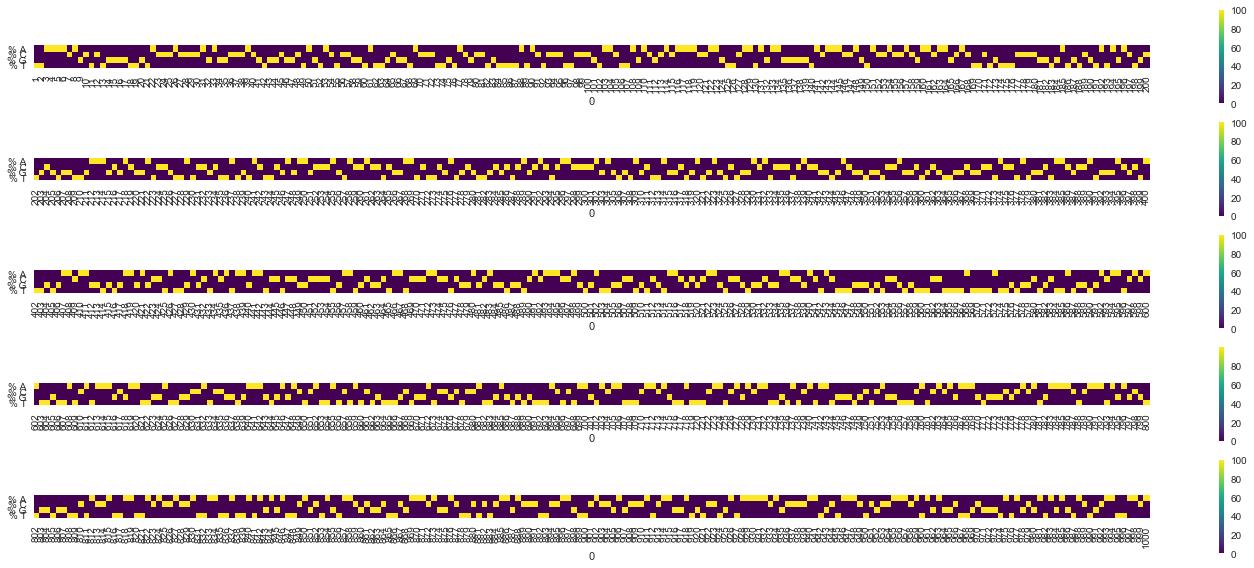

In [10]:
# Plot the probabilities
fig, ax = plt.subplots(5, 1, figsize=(25, 10))

sns.heatmap(heat_map_vals[:200].T, ax=ax[0], cmap='viridis', square=True)
plt.xticks(np.arange(0, 200, 10), np.arange(0, 200, 10))
sns.heatmap(heat_map_vals[201:400].T, ax=ax[1], cmap='viridis', square=True)
sns.heatmap(heat_map_vals[401:600].T, ax=ax[2], cmap='viridis', square=True)
sns.heatmap(heat_map_vals[601:800].T, ax=ax[3], cmap='viridis', square=True)
sns.heatmap(heat_map_vals[801:1000].T, ax=ax[4], cmap='viridis', square=True)

#plt.yticks([0, 1, 2, 3], ['%T', '%G', '%C', '%A'])
plt.show()

In [11]:
"""num_seq = heat_map_vals.shape[0]
num_range = num_seq // 200
fig, ax = plt.subplots(num_seq, 1, figsize=(5 * num_seq, 10))
for i in range(num_seq):
    sns.heatmap(heat_map_vals[i*200:i*200 + 200].T, ax=ax[i], cmap='viridis', square=True)
    
plt.show()"""

"num_seq = heat_map_vals.shape[0]\nnum_range = num_seq // 200\nfig, ax = plt.subplots(num_seq, 1, figsize=(5 * num_seq, 10))\nfor i in range(num_seq):\n    sns.heatmap(heat_map_vals[i*200:i*200 + 200].T, ax=ax[i], cmap='viridis', square=True)\n    \nplt.show()"

In [14]:
alignment, score, start_end_positions = skbio.alignment.local_pairwise_align_ssw(DNA(str(test_seq)), skbio.DNA(str(pv1_genome.seq)))

In [15]:
# See what mutations diverge from the poliovirus 1 serotype
for index, i in enumerate(alignment.iter_positions()):
    if i[0] != i[1]:
        print(index, i[0], i[1])

283 C -
285 C -
287 C T
351 G T
387 C -
485 - T
486 T G
488 G T
1466 A -
1467 G A
1527 T -
1528 C T
1533 A -
1534 C A
1547 C T
1579 C A
1601 A C
1668 C T
2001 A C
2004 A C
2005 T C
2006 C T
2035 T C
2133 T C
2286 C G
2983 G A
3043 A G
3306 G C
3307 C A
3308 A G
3309 G C
3658 C T
3697 C A
3767 C A
4153 - A
4155 A G
4156 G C
4157 C A
4158 A T
4159 T G
4160 G C
4163 A -
4164 C A
4165 G C
4166 C G
4176 A C
5115 A C
5600 T C
5621 C T
5623 C T
5625 C T
5647 C T
5788 G C
5902 G -
5905 A G
5928 T -
5929 G -
5930 G T
5932 A G
5972 A T
5973 C A
5999 A C
6021 A C
6023 T C
6263 C T
7412 T C


In [18]:
temp_polyprotein_dna = ''
for i in range(len(test_seq)):
    temp_codon = test_seq[i:i+3]
    #print(i, temp_codon)
    if temp_codon == 'ATG' and i in np.arange(723, 763):
        print(i, test_seq[i:i+3])
        for j in range(i, len(test_seq)-i, 3):
            print(test_seq[j:j+3])
            if test_seq[j:j+3].translate() == '*':
                print(j, test_seq[j:j+3])
                break
            else:
                temp_polyprotein_dna += test_seq[j:j+3]

742 ATG
ATG
GGT
GCT
CAG
GTT
TCA
TCA
CAG
AAA
GTG
GGC
GCA
CAT
GAA
AAC
TCA
AAT
AGA
GCG
TAT
GGT
GGT
TCT
ACC
ATT
AAT
TAC
ACC
ACC
ATT
AAT
TAT
TAT
AGA
GAT
TCA
GCT
AGT
AAC
GCG
GCT
TCG
AAA
CAG
GAC
TTC
TCT
CAA
GAC
CCT
TCC
AAG
TTC
ACC
GAG
CCC
ATC
AAG
GAT
GTC
CTG
ATA
AAA
ACA
GCC
CCA
ATG
CTA
AAC
TCG
CCA
AAC
ATA
GAG
GCT
TGC
GGG
TAT
AGC
GAT
AGA
GTA
CTG
CAA
TTA
ACA
CTG
GGA
AAC
TCC
ACT
ATA
ACC
ACA
CAG
GAG
GCG
GCT
AAT
TCA
GTA
GTC
GCT
TAT
GGG
CGT
TGG
CCT
GAA
TAT
CTG
AGG
GAC
AGC
GAA
GCC
AAT
CCA
GTG
GAC
CAG
CCG
ACA
GAA
CCA
GAC
GTC
GCT
GCA
TGC
AGG
TTT
TAT
ACG
CTA
GAC
ACC
GTG
TCT
TGG
ACG
AAA
GAG
TCG
CGA
GGG
TGG
TGG
TGG
AAG
TTG
CCT
GAT
GCA
CTG
AGG
GAC
ATG
GGA
CTC
TTT
GGG
CAA
AAT
ATG
TAC
TAC
CAC
TAC
CTA
GGT
AGG
TCC
GGG
TAC
ACC
GTG
CAT
GTA
CAG
TGT
AAC
GCC
TCC
AAA
TTC
CAC
CAG
GGG
GCA
CTA
GGG
GTA
TTC
GCC
GTA
CCA
GAG
ATG
TGT
CTG
GCC
GGG
GAT
AGC
AAC
ACC
ACT
ACC
ATG
CAC
ACC
AGC
TAT
CAA
AAT
GCC
AAT
CCT
GGC
GAG
AAA
GGA
GGC
ACT
TTC
ACG
GGT
ACG
TTC
ACT
CCT
GAC
AAC
AAC
CAG
ACA
TCA
CCT
GCC
CGC
AGG
TTC
TGC
CCG
GTG
GAT
TAC


In [17]:
len(temp_polyprotein_dna)

6033

In [224]:
reference_polyprotein_dna = ''
for i in range(len(test_seq)):
    temp_codon = pv1_genome[i:i+3].seq
    #print(i, temp_codon)
    if temp_codon == 'ATG' and i in np.arange(723, 763):
        print(i, str(pv1_genome[i:i+3].seq))
        for j in range(i, len(pv1_genome)-i, 3):
            reference_polyprotein_dna += pv1_genome[j:j+3]

740 ATG


In [228]:
len(str(reference_polyprotein_dna.seq))

5955

In [235]:
alignment, score, start_end_positions = skbio.alignment.local_pairwise_align_ssw(skbio.DNA(str(reference_polyprotein_dna.seq)),
                                                                                 skbio.DNA(str(temp_polyprotein_dna)))

In [241]:
# Go through each series of passages and find how the consensus sequence changes over each iteration
rep_1_sequences = []

for file in pv1_passage_rep_1_files:
    # Read a test file into a pandas dataframe
    test_df = pd.read_csv(pv1_passage_rep_1_files[0], delimiter='\t', header=None)
    # Set the position as the index
    test_df = test_df.set_index(0)
    # Rename the columns
    test_df = test_df.rename(columns={1: 'Consensus', 2: 'A', 3:'C', 4:'G', 5:'T'})
    # Return the consensus sequence as a Bio.Seq object
    temp_seq = skbio.DNA(test_df.sum(axis=0)[0])
    rep_1_sequences.append(temp_seq)
    
# Go through each series of passages and find how the consensus sequence changes over each iteration
rep_2_sequences = []

for file in pv1_passage_rep_1_files:
    # Read a test file into a pandas dataframe
    test_df = pd.read_csv(pv1_passage_rep_2_files[0], delimiter='\t', header=None)
    # Set the position as the index
    test_df = test_df.set_index(0)
    # Rename the columns
    test_df = test_df.rename(columns={1: 'Consensus', 2: 'A', 3:'C', 4:'G', 5:'T'})
    # Return the consensus sequence as a Bio.Seq object
    temp_seq = skbio.DNA(test_df.sum(axis=0)[0])
    rep_2_sequences.append(temp_seq)

In [281]:
# See if the virus consensus sequence diverges over the seven passages
for i in range(len(rep_1_sequences[0])):
    temp_aligned = [str(x[i]) for x in rep_1_sequences]
    #print(set(temp_aligned))
    if len(set(temp_aligned)) != 1:
        print(temp_aligned)

In [282]:
# See if the replicate virus consensus diverges over the seven passages
for i in range(len(rep_2_sequences[0])):
    temp_aligned = [str(x[i]) for x in rep_2_sequences]
    #print(set(temp_aligned))
    if len(set(temp_aligned)) != 1:
        print(temp_aligned)

The passages do not diverge. The consensus sequences are exactly the same over the entire time.